# LAB 6 Overfitting - regularization

In [1]:
import sklearn
from sklearn.datasets import load_boston
boston = load_boston() 

In [2]:
print(boston.keys())
print(boston.data.shape)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
(506, 13)


In [3]:
print(boston.DESCR)


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
import numpy as np
import pandas as pd
 
bos = pd.DataFrame(boston.data)
print(bos.head())

        0     1     2    3      4   ...   8      9     10      11    12
0  0.00632  18.0  2.31  0.0  0.538  ...  1.0  296.0  15.3  396.90  4.98
1  0.02731   0.0  7.07  0.0  0.469  ...  2.0  242.0  17.8  396.90  9.14
2  0.02729   0.0  7.07  0.0  0.469  ...  2.0  242.0  17.8  392.83  4.03
3  0.03237   0.0  2.18  0.0  0.458  ...  3.0  222.0  18.7  394.63  2.94
4  0.06905   0.0  2.18  0.0  0.458  ...  3.0  222.0  18.7  396.90  5.33

[5 rows x 13 columns]


## Ex. 1 Split train-test dataset
As there is no column called ‘PRICE’ in the data frame - the target values are available in other attribute called target.

The goal of your next implementation is to shuffle the data into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:

Use train_test_split from sklearn.model_selection import train_test_split to shuffle and split the features and prices data into training and testing sets (please check version, can work for sklearn.cross_validation).
from
Split the data into 80% training and 20% testing.
Set the random_state for train_test_split to a value of your choice. This ensures results are consistent.
Assign the train and testing splits to 'X_train, X_test, y_train, and y_test.


In [5]:
# get the data
boston_X = boston.data
boston_Y = boston.target

# #Normalization
# boston_X_df = pd.DataFrame(boston_X)
# boston_Y_df = pd.DataFrame(boston_Y)

# boston_X_df = (boston_X_df - boston_X_df.mean())/boston_X_df.std()
# boston_X = boston_X_df.values

# boston_Y_df = (boston_Y_df - boston_Y_df.mean())/boston_Y_df.std()
# boston_Y = boston_Y_df.values

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(boston_X, boston_Y, test_size = 0.2, random_state = 42)

In [8]:
print(boston_X.shape[0])
print(float(X_train.shape[0]) / float(boston_X.shape[0]))
print(float(X_test.shape[0]) / float(boston_X.shape[0]))

506
0.7984189723320159
0.2015810276679842


## Ex. 2 Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [10]:
lr_model = LinearRegression()

lr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
y_pred = lr_model.predict(X_test)
print(y_pred[:5])

[28.99672362 36.02556534 14.81694405 25.03197915 18.76987992]


Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

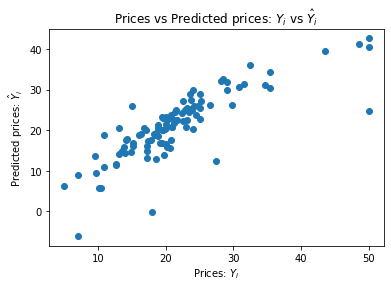

In [12]:
plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

*How should an ideal scatter look like?*  
- Ideal scatter should look like a linear function y = x. Predicted prices should be equal to real (true) prices.  

## Ex. 3: To check the level of error of a model calculate the Mean Squared Error.


In [13]:
from sklearn.metrics import  mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error = {mse}")

Mean Squared Error = 24.291119474973616


## Ex. 4: Calculate the model.score. Check what it is for linear problems.

In [14]:
from sklearn.preprocessing import StandardScaler


In [15]:
scaler = StandardScaler()

boston_X_scaled = scaler.fit_transform(X = boston_X, y = boston_Y)

In [16]:
from sklearn.preprocessing import PolynomialFeatures
 
polynomial_features= PolynomialFeatures(degree=2)

In [17]:
pol_features_X = polynomial_features.fit_transform(boston_X_scaled, boston_Y)


In [18]:
pol_features_X

array([[ 1.        , -0.41978194,  0.28482986, ...,  0.19452681,
        -0.47437883,  1.15683427],
       [ 1.        , -0.41733926, -0.48772236, ...,  0.19452681,
        -0.21719133,  0.24249653],
       [ 1.        , -0.41734159, -0.48772236, ...,  0.15715436,
        -0.47917217,  1.46102192],
       ...,
       [ 1.        , -0.41344658, -0.48772236, ...,  0.19452681,
        -0.43357505,  0.9663826 ],
       [ 1.        , -0.40776407, -0.48772236, ...,  0.16259032,
        -0.34891116,  0.74874691],
       [ 1.        , -0.41500016, -0.48772236, ...,  0.19452681,
        -0.29508947,  0.44763905]])

In [19]:
pol_features_X_train, pol_features_X_test, pol_features_y_train, pol_features_y_test = train_test_split(pol_features_X, boston_Y, test_size = 0.2, random_state = 42)

In [20]:
lr_model_pol_features = LinearRegression()

lr_model_pol_features.fit(pol_features_X_train, pol_features_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
pol_features_y_pred = lr_model_pol_features.predict(pol_features_X_test)
print(pol_features_y_pred[:5])

[27.02001953 34.87939453 14.37182617 21.01586914 16.33276367]


Text(0.5, 1.0, 'Polynomial FEATIRES USED: Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

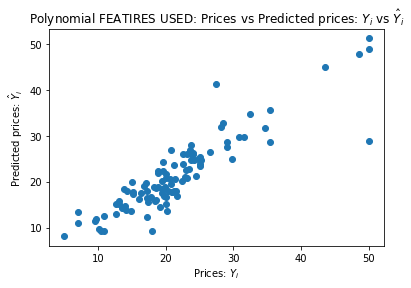

In [22]:
plt.scatter(pol_features_y_test, pol_features_y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Polynomial FEATIRES USED: Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

In [23]:
pol_features_mse = mean_squared_error(pol_features_y_test, pol_features_y_pred)
print(f"Mean Squared Error = {pol_features_mse}")

Mean Squared Error = 14.259416570242713


**NOTE:** The MSE has decreased from 24 to 14 after using `StandardScaler` and `PolynomialFeatures`

## Ex. 5: Lasso

Lasso Regression:
Performs L1 regularization, i.e. adds penalty equivalent to absolute value of the magnitude of coefficients
Minimization objective = LS Obj + α * (sum of absolute value of coefficients)



In [24]:
alpha = 1.0 

In [25]:
from sklearn.linear_model import Lasso

reg_lasso = Lasso(alpha)
reg_lasso.fit(pol_features_X_train, pol_features_y_train)
reg_lasso.score(pol_features_X_train, pol_features_y_train)


0.7721332716241069

In [26]:
reg_lasso.score(pol_features_X_test, pol_features_y_test)

0.7352137474156291

In [27]:
import warnings
warnings.filterwarnings('ignore')

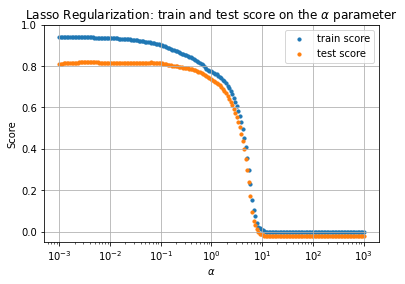

In [28]:
alpha_lin = np.logspace(-3, 3, 200) # alpha from 0.001 to 1000
train_scores = []
test_scores = []

for alpha in alpha_lin:
  reg_lasso = Lasso(alpha)
  reg_lasso.fit(pol_features_X_train, pol_features_y_train)
  train_scores.append(reg_lasso.score(pol_features_X_train, pol_features_y_train))
  test_scores.append(reg_lasso.score(pol_features_X_test, pol_features_y_test))
plt.scatter(alpha_lin, train_scores, 10)
plt.scatter(alpha_lin, test_scores, 10)
plt.xlabel(r"$\alpha$")
plt.xscale("log")
plt.ylabel("Score")
plt.ylim((-0.05,1))
plt.title(r"Lasso Regularization: train and test score on the $\alpha$ parameter")
plt.legend(["train score", "test score"])
plt.grid(True)
plt.show()

## Ex.6 Ridge

Ridge Regression:

*   Performs L2 regularization, i.e. adds penalty equivalent to square of the magnitude of coefficients
*   Minimization objective = LS Obj + α * (sum of square of coefficients)



In [29]:
alpha = 1.0
from sklearn.linear_model import Ridge

reg_ridge = Ridge(alpha)
reg_ridge.fit(pol_features_X_train, pol_features_y_train)
reg_ridge.score(pol_features_X_train, pol_features_y_train)

0.9378588799762277

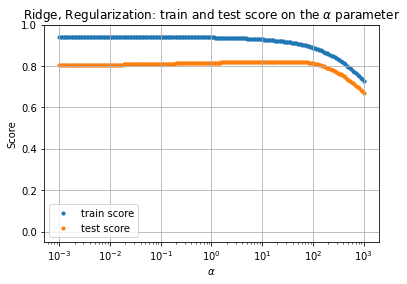

In [30]:
alpha_lin = np.logspace(-3, 3, 200) # alpha from 0.001 to 1000
train_scores = []
test_scores = []

for alpha in alpha_lin:
  reg_ridge = Ridge(alpha)
  reg_ridge.fit(pol_features_X_train, pol_features_y_train)
  train_scores.append(reg_ridge.score(pol_features_X_train, pol_features_y_train))
  test_scores.append(reg_ridge.score(pol_features_X_test, pol_features_y_test))

plt.scatter(alpha_lin, train_scores, 10)
plt.scatter(alpha_lin, test_scores, 10)
plt.xlabel(r"$\alpha$")
plt.xscale("log")
plt.ylabel("Score")
plt.ylim((-0.05,1))
plt.title(r"Ridge, Regularization: train and test score on the $\alpha$ parameter")
plt.legend(["train score", "test score"])
plt.grid(True)
plt.show()

# Regularization for logistic regression


In [31]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

## Ex. 1

In [32]:
data_df =pd.DataFrame(data['data'], columns = data.feature_names)
target_df = pd.DataFrame(data['target'])

In [33]:
data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [34]:
data_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [35]:
print(f"The dataset contains 0 nulls")
data_df.isnull().sum()


The dataset contains 0 nulls


mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

## Ex. 2

In [36]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

**NOTE:** According to dataset description there is no feature desribes ID of examined person. There is no need to delete the first column

In [37]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size = 0.2, random_state = 42)

## Ex. 3

In [38]:
from sklearn.linear_model import LogisticRegression
logReg_l1_model = LogisticRegression(C=1, penalty='l1')

## Ex.4 

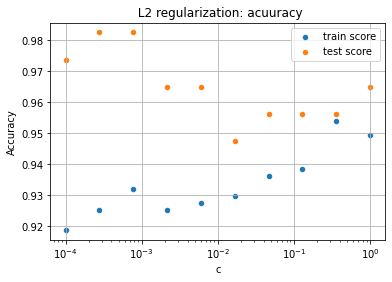

In [39]:
C_lin = np.logspace(-4, 0, 10) # alpha from 0.0001 to 1
train_scores = []
test_scores = []

for c in C_lin:
  logReg_model = LogisticRegression(C=c, penalty='l2')
  logReg_model.fit(X_train, y_train)
  train_scores.append(logReg_model.score(X_train, y_train))
  test_scores.append(logReg_model.score(X_test, y_test))

plt.scatter(C_lin, train_scores, 20)
plt.scatter(C_lin, test_scores, 20)
plt.xlabel("c")
plt.xscale("log")
plt.ylabel("Accuracy")
# plt.ylim((-0.05,1))
plt.title(r" L2 regularization: acuuracy")
plt.legend(["train score", "test score"])
plt.grid(True)
plt.show()

# Regularization for kNN method

In [40]:
from scipy.spatial import distance
from sklearn.metrics import accuracy_score

def calculate_dist(record, set_of_records):
  records_cloned = [record] * len(set_of_records)
  result = map(lambda a, b:distance.euclidean(a, b), records_cloned, set_of_records)
  return list(result)

def _knn_per_record(k, test_record, X_true, y_true):
  df = pd.DataFrame(X_true)
  df['label'] = y_true
  df['distance'] = calculate_dist(test_record, X_true)
  df.sort_values(['distance'], ascending=True, inplace=True)

  df_k_nearest = df[:k]

  label_frequency =  df_k_nearest['label'].value_counts(sort=True)
  
  if len(label_frequency.where(label_frequency == max(label_frequency)).dropna()) >1: 
     # if many labels are the most feequent take k+1 nearest values under consideration 
     if k+1 < len(X_true)/2 :
       # stop condition
        predicted_class = _knn_per_record(k+1, test_record, X_true, y_true)
     else:
       predicted_class = list(label_frequency.index)[0]          
  else:
    # take the most frequest label for the nearest points
    predicted_class = list(label_frequency.index)[0]   

  return predicted_class 

In [41]:
def knn_predict (X, X_true, y_true, k=5):
  y_predicted = []

  for x_record in X:
    y_predicted.append(_knn_per_record(k, x_record, X_true, y_true))
  
  return y_predicted

In [42]:
from sklearn import datasets

iris = datasets.load_iris()
 
#Podziel zbiór na uczący i testowy, test_size - procentowy udział (przykład 50 % uczący i testowy)
features_train, features_test, labels_train, labels_test = train_test_split(iris.data, iris.target, test_size=0.5)

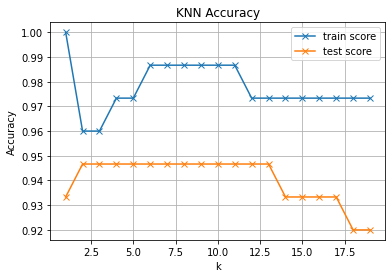

In [43]:
accuracy = []
accuracy_train = []
for k in range(1, 20):
    predictions = knn_predict(features_train, features_train, labels_train, k=k)
    accuracy_train.append(accuracy_score(labels_train, predictions))
    predictions = knn_predict(features_test, features_train, labels_train, k=k)
    accuracy.append(accuracy_score(labels_test, predictions))

plt.plot(range(1, 20), accuracy_train, 'x-')
plt.plot(range(1, 20), accuracy, 'x-')
plt.xlabel("k")
plt.ylabel("Accuracy")
# plt.ylim((-0.05,1))
plt.title(r"KNN Accuracy")
plt.legend(["train score", "test score"])
plt.grid(True)
plt.show()

In [44]:
# accuracy.index(max(accuracy))
best_k = [k for k, acc in zip(range(1, 20), accuracy) if acc==max(accuracy)]

In [45]:
best_k

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

# Decistion trees optimalization

In [46]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn import tree
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
 
 
 
# wczytywanie danych
dane = loadmat('mnist.mat')
 
#Zad 1. Podziel dane na parametry X oraz odpowiedź y:
 
X = dane['X']
y = dane['y']
 
# Standaryzacja
for i in range(X.shape[0]):
    X[i,:] = X[i,:]/np.std(X[i,:])
 
# Zamiana cyfry 10 -> 0 (błąd w zbiorze danych)    
y[np.where(y==10)]=0
 
# wysokość i szerokość obrazka z cyfrą 
h = 20
w = 20
 



In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


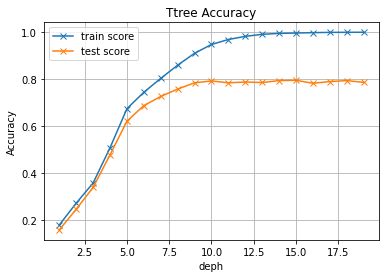

In [48]:
deph_range = range(1, 20)
accuracy_test = []
accuracy_train = []


for deph in deph_range:
  tree_classifier = tree.DecisionTreeClassifier(max_depth=deph)
  tree_classifier.fit(X_train, y_train)
  y_predicted = tree_classifier.predict(X_train)
  accuracy_train.append(accuracy_score(y_train, y_predicted))

  y_predicted = tree_classifier.predict(X_test)
  accuracy_test.append(accuracy_score(y_test, y_predicted))


plt.plot(deph_range, accuracy_train, 'x-')
plt.plot(deph_range, accuracy_test, 'x-')
plt.xlabel("deph")
plt.ylabel("Accuracy")
# plt.ylim((-0.05,1))
plt.title(r"Ttree Accuracy")
plt.legend(["train score", "test score"])
plt.grid(True)
plt.show()

In [49]:
best_deph = [deph for deph, acc in zip(deph_range, accuracy_test) if acc==max(accuracy_test)]
best_deph

[15]

Optimal tree deph is from 10 or 15.